In [1]:
import pandas as pd
import numpy as np

from dotenv import dotenv_values
CONFIG = dotenv_values("./.env")

import matplotlib.pyplot as plt
import seaborn as sns

## Import simulation data

In [2]:
df = pd.read_parquet(CONFIG["BATCH_OUTPUT_BASE_DIR"] + "batch_summary_mod.parquet")
df = df.reset_index(drop=True)
df.head()

,class,param,mean,sem,runs,arr_lam_0,base_duration_0,wait_effect_0,modality_effect_0,modality_policy_0,attend_virtual_p,attend_face_p,ns_virtual_p,ns_face_p,lm_canc_virtual_p,lm_canc_face_p,adv_canc_virtual_p,adv_canc_face_p
0,-1,age_out,0.534949,0.000959,5,10.0,15,0.0,0.0,0.0,0.9,0.9,0.025,0.025,0.025,0.025,0.05,0.05
1,-1,wait_time,75.290524,0.194548,5,10.0,15,0.0,0.0,0.0,0.9,0.9,0.025,0.025,0.025,0.025,0.05,0.05
2,-1,pct_face,0.000000,0.000000,5,10.0,15,0.0,0.0,0.0,0.9,0.9,0.025,0.025,0.025,0.025,0.05,0.05
3,0,age_out,0.534949,0.000959,5,10.0,15,0.0,0.0,0.0,0.9,0.9,0.025,0.025,0.025,0.025,0.05,0.05
4,0,wait_time,75.290524,0.194548,5,10.0,15,0.0,0.0,0.0,0.9,0.9,0.025,0.025,0.025,0.025,0.05,0.05


## Select the best policy for each parameterization

In [3]:
outcome = "wait_time"
temp = df.loc[(df['param']==outcome) & (df['class']==-1)].groupby(by=['modality_effect_0', 'attend_face_p'], as_index=False)['mean'].idxmin()

best_pols = df.loc[temp['mean'],:]
best_pols['modality_effect_0'] = np.round(best_pols['modality_effect_0'],1)
best_pols['attend_face_p'] = np.round(best_pols['attend_face_p'], 2)
best_pols.head()

,class,param,mean,sem,runs,arr_lam_0,base_duration_0,wait_effect_0,modality_effect_0,modality_policy_0,attend_virtual_p,attend_face_p,ns_virtual_p,ns_face_p,lm_canc_virtual_p,lm_canc_face_p,adv_canc_virtual_p,adv_canc_face_p
2221,-1,wait_time,61.225337,0.119779,5,10.0,15,0.0,-7.5,1.0,0.9,0.40,0.025,0.1500,0.025,0.1500,0.05,0.300
1411,-1,wait_time,54.474147,0.168064,5,10.0,15,0.0,-7.5,1.0,0.9,0.45,0.025,0.1375,0.025,0.1375,0.05,0.275
601,-1,wait_time,47.160854,0.199371,5,10.0,15,0.0,-7.5,1.0,0.9,0.50,0.025,0.1250,0.025,0.1250,0.05,0.250
7771,-1,wait_time,40.433585,0.135114,5,10.0,15,0.0,-7.5,1.0,0.9,0.55,0.025,0.1125,0.025,0.1125,0.05,0.225
6967,-1,wait_time,33.758760,0.166138,5,10.0,15,0.0,-7.5,1.0,0.9,0.60,0.025,0.1000,0.025,0.1000,0.05,0.200


In [4]:
best_pols['modality_policy_0'].value_counts()

modality_policy_0
1.0    77
0.0    41
0.9     1
0.4     1
0.1     1
Name: count, dtype: int64

Text(0.5, 80.7222222222222, 'In-person Appointment Attendance Probability')

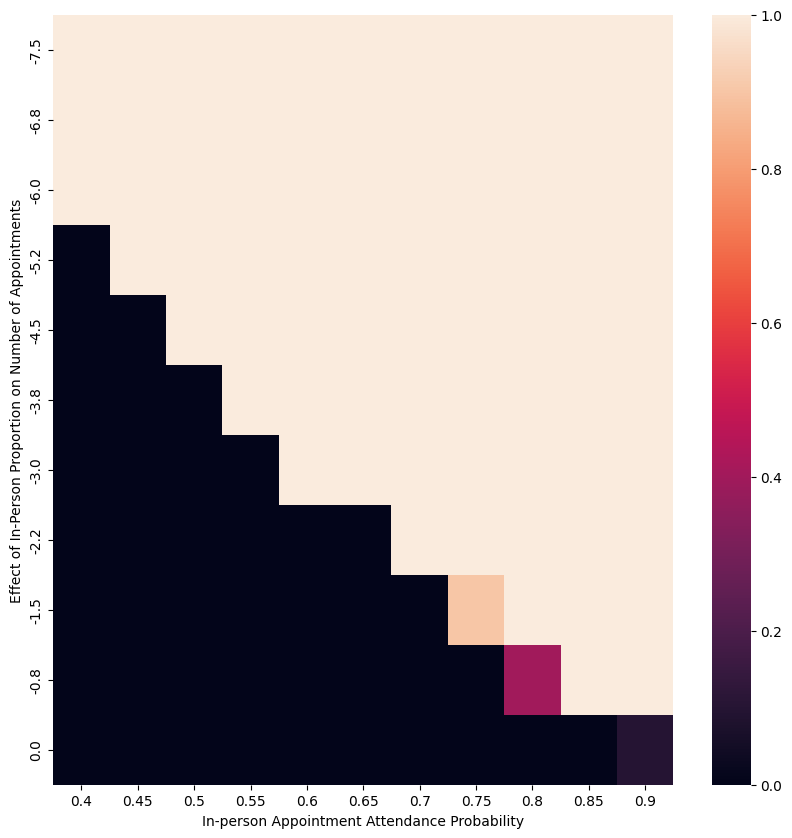

In [ ]:
heatmap = best_pols.pivot(index='modality_effect_0', columns='attend_face_p', values='modality_policy_0')

fig = plt.figure(figsize=(10,10))
sns.heatmap(heatmap)
plt.ylabel("Effect of In-Person Proportion on Number of Appointments")
plt.xlabel("In-person Appointment Attendance Probability")
plt.title()